 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [9]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [1]:
import pandas as pd
import pathlib as path
import numpy as np
import datetime as dt
import os

%matplotlib inline

In [7]:
whale_returns_csv = ("./Resources/whale_returns.csv")

In [221]:
whale_returns = pd.read_csv(whale_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [222]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [223]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [224]:
# Reading algorithmic returns
algo_returns_csv = ("./Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv,index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns = algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [225]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [226]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [227]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_csv = ("./Resources/sp_tsx_history.csv")
sp_tsx_returns = pd.read_csv(sp_tsx_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_returns = sp_tsx_returns.sort_index()
sp_tsx_returns.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [228]:
# Check Data Types
sp_tsx_returns.dtypes

Close    object
dtype: object

In [229]:
# Fix Data Types
sp_tsx_returns["Close"] = sp_tsx_returns["Close"].str.strip("$")
sp_tsx_returns["Close"] = sp_tsx_returns["Close"].str.replace(",","")
sp_tsx_returns

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [230]:
sp_tsx_returns["Close"] = sp_tsx_returns["Close"].astype("float")
sp_tsx_returns.dtypes

Close    float64
dtype: object

In [231]:
# Calculate Daily Returns
daily_returns = sp_tsx_returns.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [232]:
# Drop nulls
daily_returns = daily_returns.dropna()
daily_returns

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [233]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns = daily_returns.rename(columns = {'Close':'S&P TSX 60 Historic Returns'})
daily_returns

,S&P TSX 60 Historic Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [234]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([daily_returns, algo_returns, whale_returns], axis ="columns", join="inner") 
combined_returns.head()

,S&P TSX 60 Historic Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.003371,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001344,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.009972,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.006555,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily_Returns'}, xlabel='Date'>

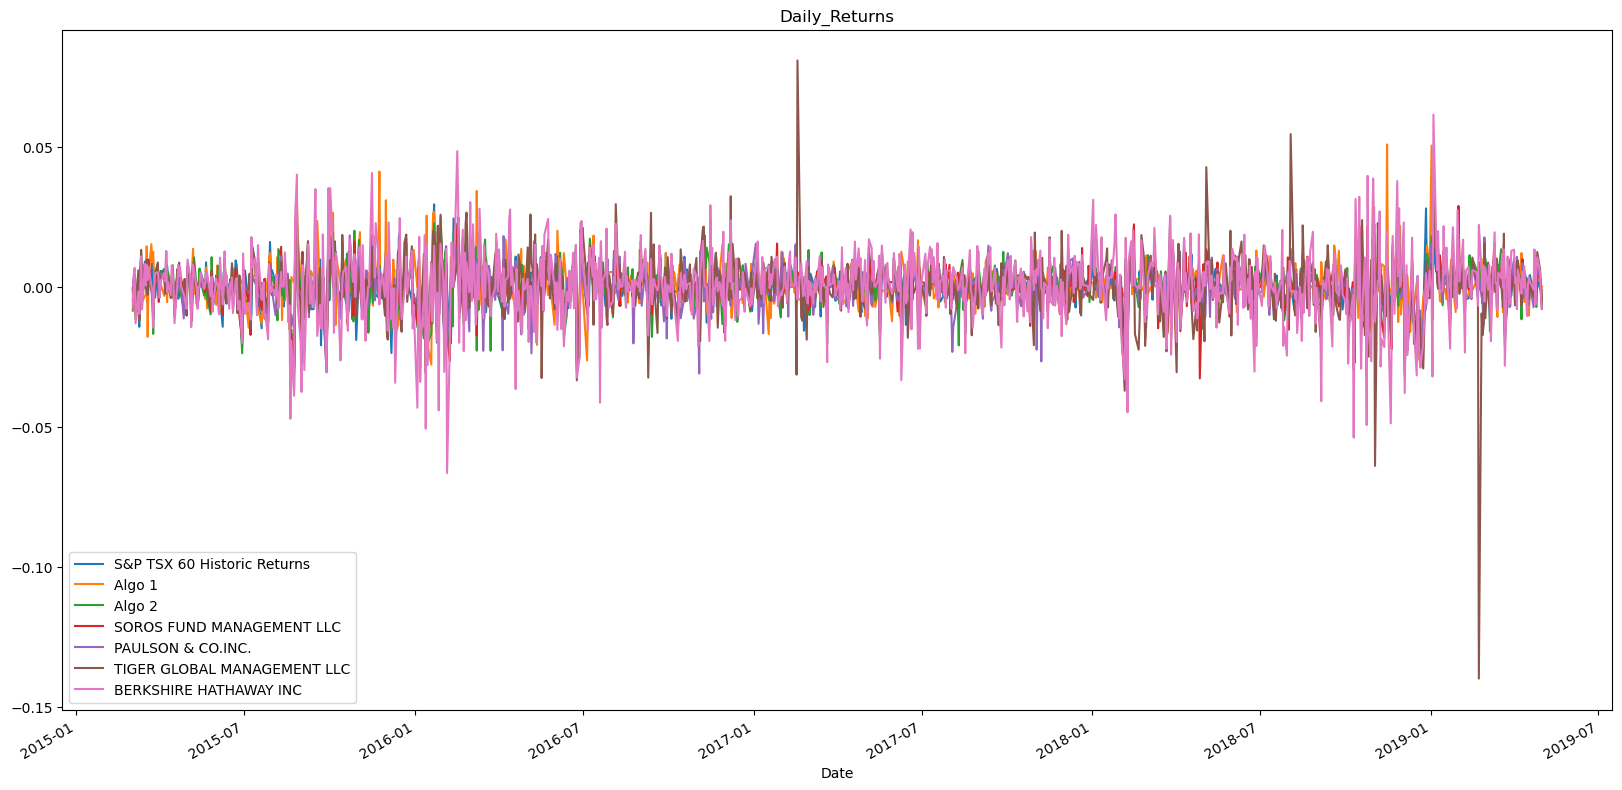

In [235]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(20, 10), title = "Daily_Returns")

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative_Returns'}, xlabel='Date'>

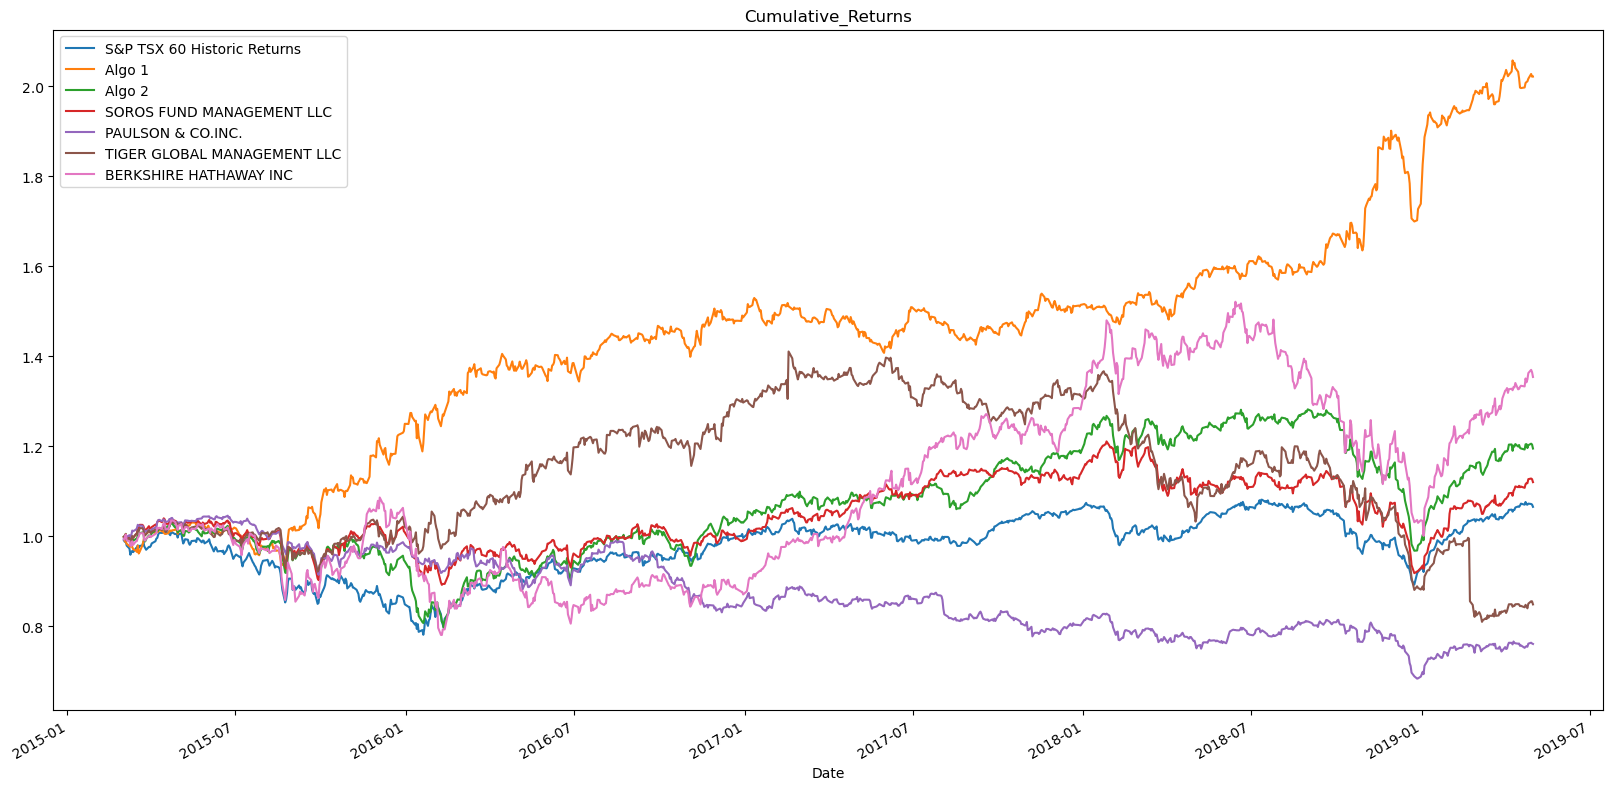

In [236]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title = "Cumulative_Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

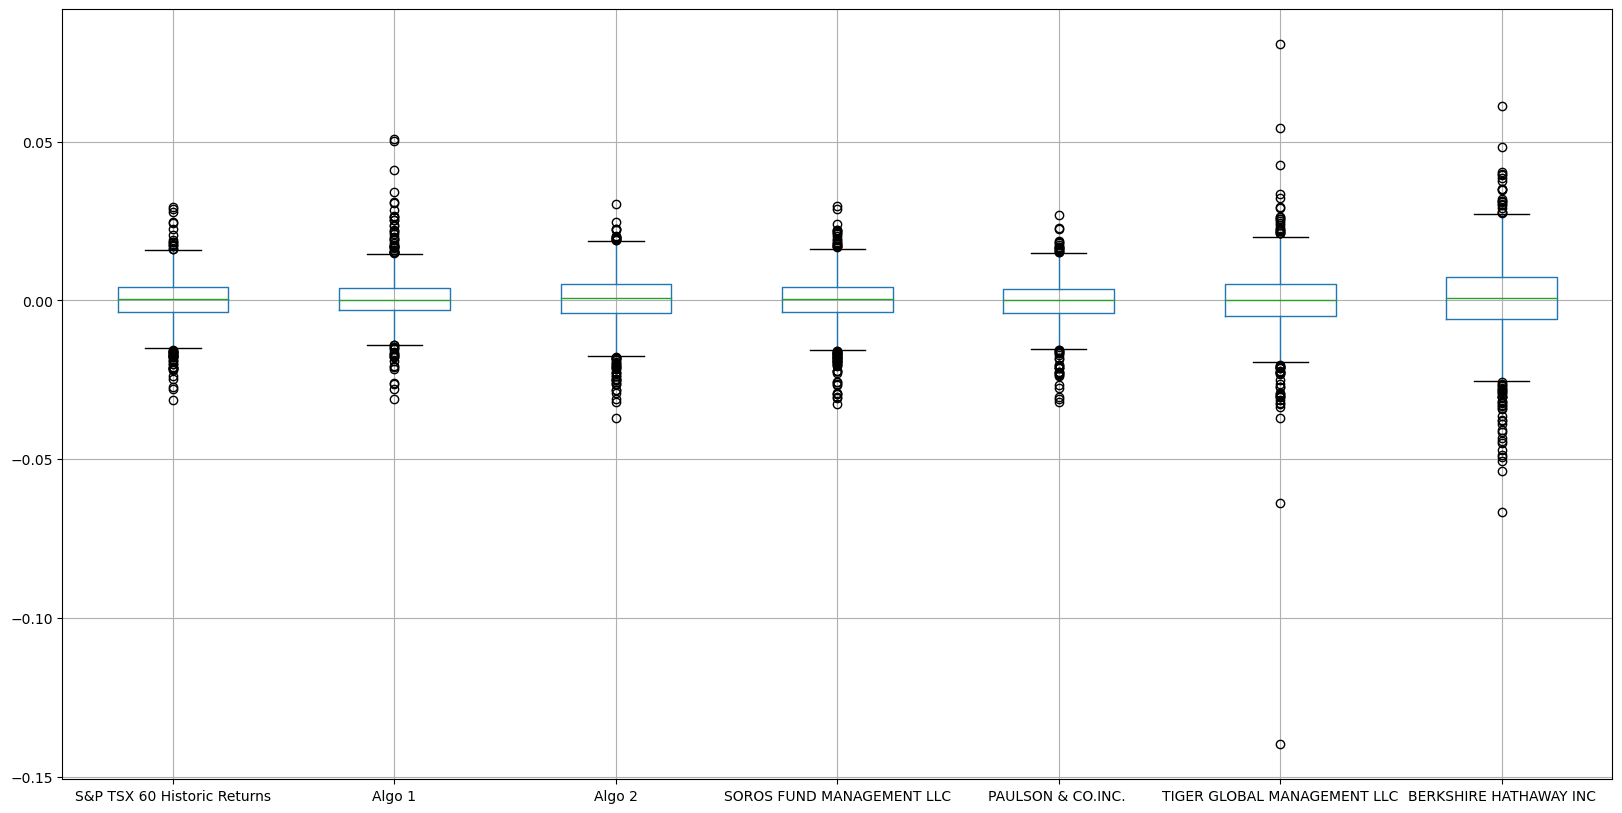

In [237]:
# Box plot to visually show risk
combined_returns.boxplot(figsize=(20, 10))

### Calculate Standard Deviations

In [280]:
# Calculate the daily standard deviations of all portfolios
standard_dev = combined_returns.std()
standard_dev

S&P TSX 60 Historic Returns    0.007034
Algo 1                         0.007589
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [239]:
# Calculate  the daily standard deviation of S&P TSX 60
print(daily_returns.std())
# Determine which portfolios are riskier than the S&P TSX 60
print("Berkshire, Tiger Global and Paulson & Co are Riskier")

S&P TSX 60 Historic Returns    0.006637
dtype: float64
Berkshire, Tiger Global and Paulson & Co are Riskier


### Calculate the Annualized Standard Deviation

In [282]:
# Calculate the annualized standard deviation (252 trading days)
annualized_standard_deviation = standard_dev*np.sqrt(252)
annualized_standard_deviation

S&P TSX 60 Historic Returns    0.111664
Algo 1                         0.120470
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

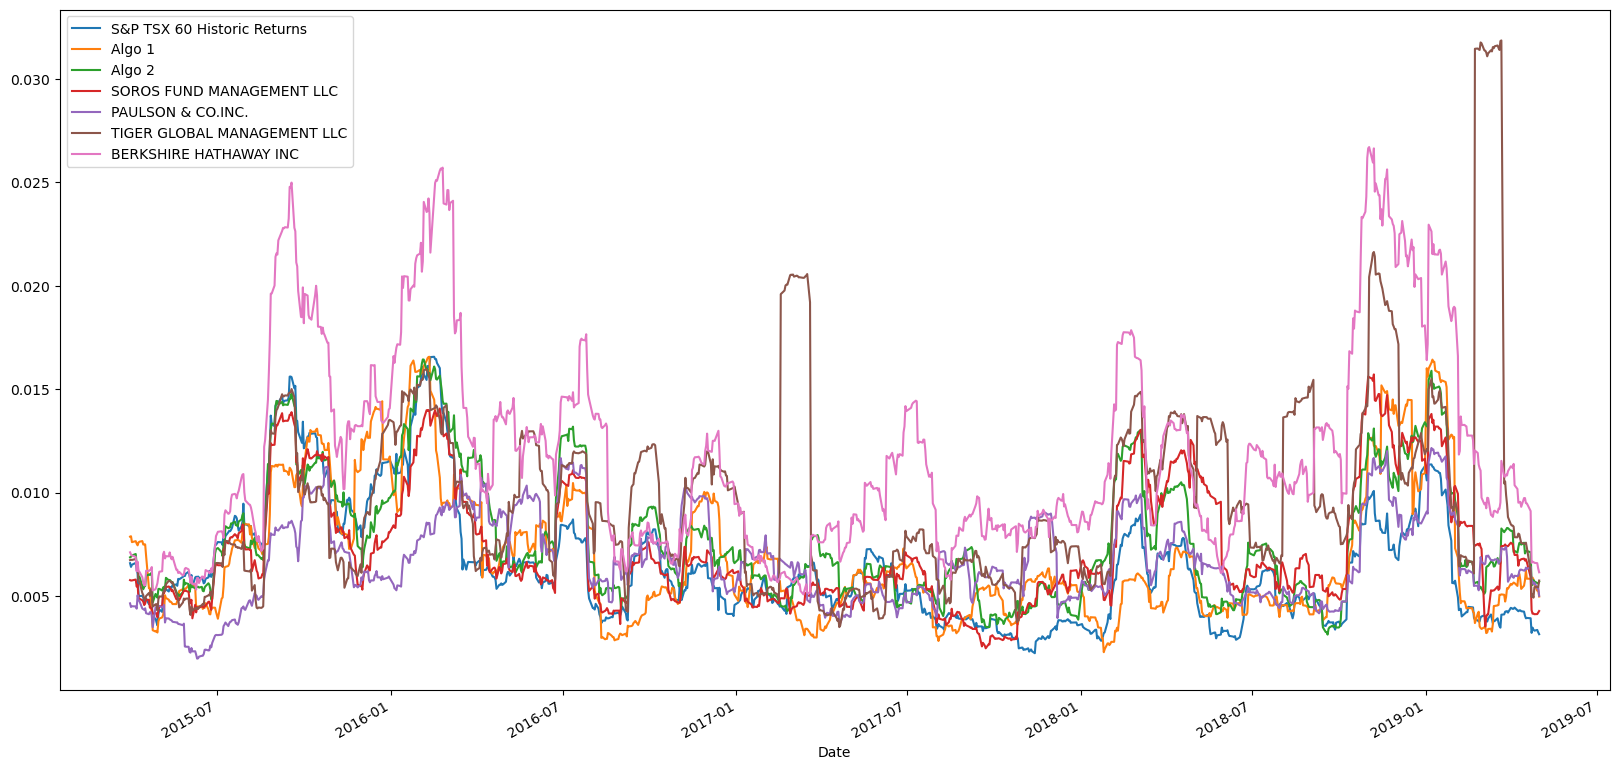

In [240]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
combined_returns.rolling(window=21).std().plot(figsize =(20, 10))

### Calculate and plot the correlation

In [268]:
# Calculate the correlation
correlation = combined_returns.corr()
correlation
# Display de correlation matrix


,S&P TSX 60 Historic Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
S&P TSX 60 Historic Returns,1.000000,0.310276,0.737370,0.673930,0.486511,0.440583,0.557250
Algo 1,0.310276,1.000000,0.285455,0.313795,0.266363,0.161236,0.289378
Algo 2,0.737370,0.285455,1.000000,0.826667,0.674015,0.506689,0.684609
SOROS FUND MANAGEMENT LLC,0.673930,0.313795,0.826667,1.000000,0.697076,0.560964,0.750181
PAULSON & CO.INC.,0.486511,0.266363,0.674015,0.697076,1.000000,0.433034,0.540033
TIGER GLOBAL MANAGEMENT LLC,0.440583,0.161236,0.506689,0.560964,0.433034,1.000000,0.423524
BERKSHIRE HATHAWAY INC,0.557250,0.289378,0.684609,0.750181,0.540033,0.423524,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [275]:
# Calculate covariance of a single portfolio
covariance = combined_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined_returns["S&P TSX 60 Historic Returns"])
covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000019
2019-04-26    0.000019
2019-04-29    0.000018
2019-04-30    0.000018
2019-05-01    0.000018
Length: 1029, dtype: float64

In [320]:
# Calculate variance of S&P TSX
variance = combined_returns["S&P TSX 60 Historic Returns"].rolling(60).var()
variance


Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX 60 Historic Returns, Length: 1029, dtype: float64

In [321]:
# Computing beta
sp_tsx_beta = (covariance)/(variance)
sp_tsx_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    1.243097
2019-04-26    1.245349
2019-04-29    1.207654
2019-04-30    1.229613
2019-05-01    1.221931
Length: 1029, dtype: float64

<Axes: xlabel='Date'>

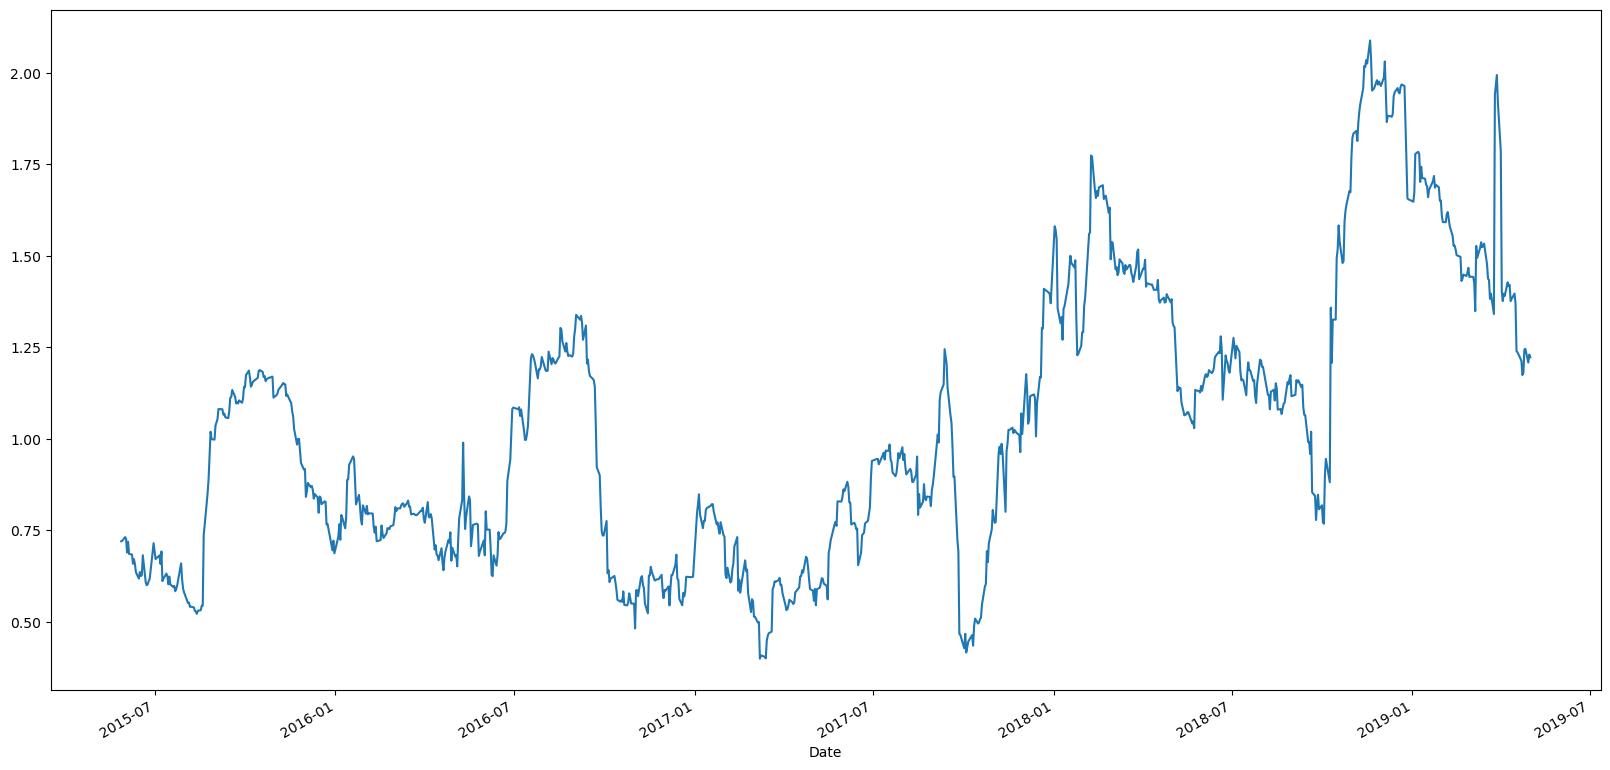

In [322]:
# Plot beta trend
sp_tsx_beta.plot(figsize=(20, 10))


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [278]:
# Use `ewm` to calculate the rolling window
rolling_window = combined_returns.ewm(halflife='21 days', times=pd.DatetimeIndex().std()

SyntaxError: incomplete input (486906161.py, line 2)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [323]:
# Annualized Sharpe Ratios
annualized_sr = (combined_returns.mean() * 252)/(standard_dev * np.sqrt(252))
annualized_sr

S&P TSX 60 Historic Returns    0.195550
Algo 1                         1.491514
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
dtype: float64

In [329]:
# Visualize the sharpe ratios as a bar plot
boxplot = annualized_sr.boxplot(figsize = (5,5))

AttributeError: 'Series' object has no attribute 'boxplot'

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

--- The Algorithmic strategies out perform the S&P TSX 60 and all of the whales portfolios except Berkshire Hathaway.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [325]:
# Reading data from 1st stock
loblaws_returns = ("./Resources/l_historical.csv")
loblaws_returns = pd.read_csv(loblaws_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
loblaws_returns = loblaws_returns.sort_index()
loblaws_returns.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [326]:
# Reading data from 2nd stock
otext_returns = ("./Resources/otex_historical.csv")
otext_returns = pd.read_csv(otext_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
otext_returns = otext_returns.sort_index()
otext_returns.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [327]:
# Reading data from 3rd stock
shop_returns = ("./Resources/shop_historical.csv")
shop_returns = pd.read_csv(shop_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_returns = shop_returns.sort_index()
shop_returns.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [328]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([shop_returns, otext_returns, loblaws_returns], axis ="columns", join="inner") 
combined_stocks.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [332]:
# Reset Date index


In [338]:
# Reorganize portfolio data by having a column per symbol
all_prices = pd.concat([loblaws_returns, otext_returns, shop_returns], axis="rows", join="inner")
all_prices = all_prices.reset_index()
all_prices = all_prices.pivot_table(values="Close", index="Date", columns="Symbol")
all_prices.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [343]:
# Calculate daily returns

all_returns = all_prices.pct_change()
all_returns.head()
# Drop NAs
all_returns = all_returns.dropna()
# Display sample data
all_returns

Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [346]:
# Set weights
weights = [1/3, 1/3, 1/3]
l_weight = 1/3
otex_weight = 1/3
shop_weight = 1/3
# Calculate portfolio return
portfolio_returns = l_weight * all_returns["L"] + otex_weight * all_returns["OTEX"] + shop_weight * all_returns["SHOP"]
portfolio_returns.head()
# Display sample data


Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [386]:
# Join your returns DataFrame to the original returns DataFrame
total_returns = pd.concat([combined_returns],[all_returns], axis="columns", join="inner")
total_returns.head()

/var/folders/wy/jrzdc8557zd6jyny6zcf8trc0000gn/T/ipykernel_19806/1925082990.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  total_returns = pd.concat([combined_returns],[all_returns], axis="columns", join="inner")


TypeError: concat() got multiple values for argument 'axis'

In [368]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_returns = total_returns.dropna()

NameError: name 'total_returns' is not defined

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [389]:
# Calculate the annualized `std`
portfolio_annualized_sd = all_returns.std()*np.sqrt(252)
portfolio_annualized_sd

Symbol
L       0.152369
OTEX    0.215132
SHOP    0.488717
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling STD'}, xlabel='Date'>

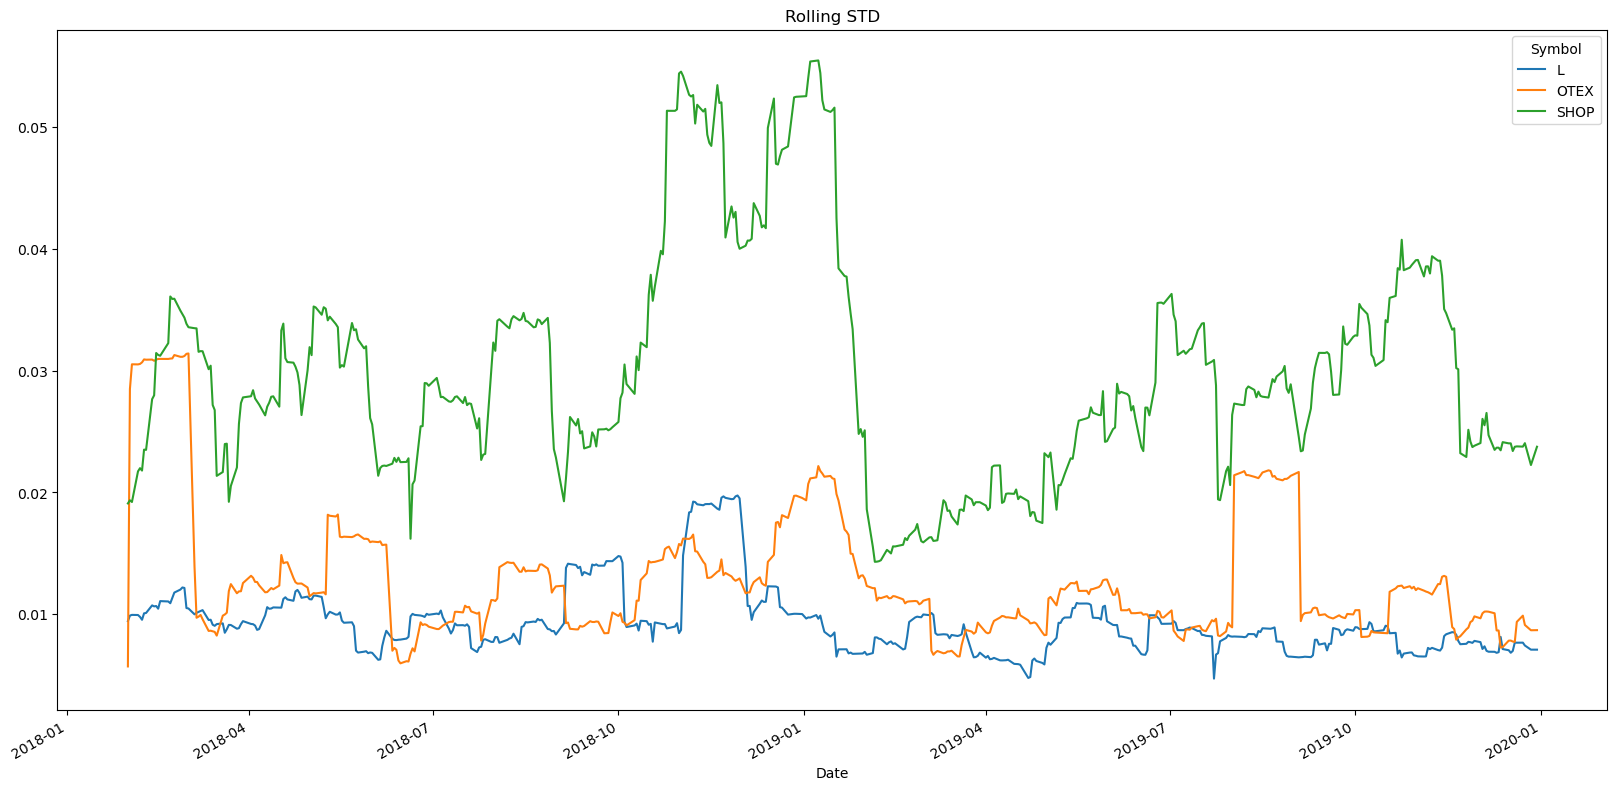

In [390]:
# Calculate rolling standard deviation
all_returns.rolling(window=21).std()
# Plot rolling standard deviation
all_returns.rolling(window=21).std().plot(figsize=[20,10], title = "Rolling STD")

### Calculate and plot the correlation

In [392]:
# Calculate and plot the correlation
correlation_port = all_returns.corr()
correlation_port

Symbol,L,OTEX,SHOP
Symbol,,,
L,1.000000,0.181266,0.127501
OTEX,0.181266,1.000000,0.398427
SHOP,0.127501,0.398427,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<Axes: title={'center': 'Rolling 60-Day Beta'}, xlabel='Date'>

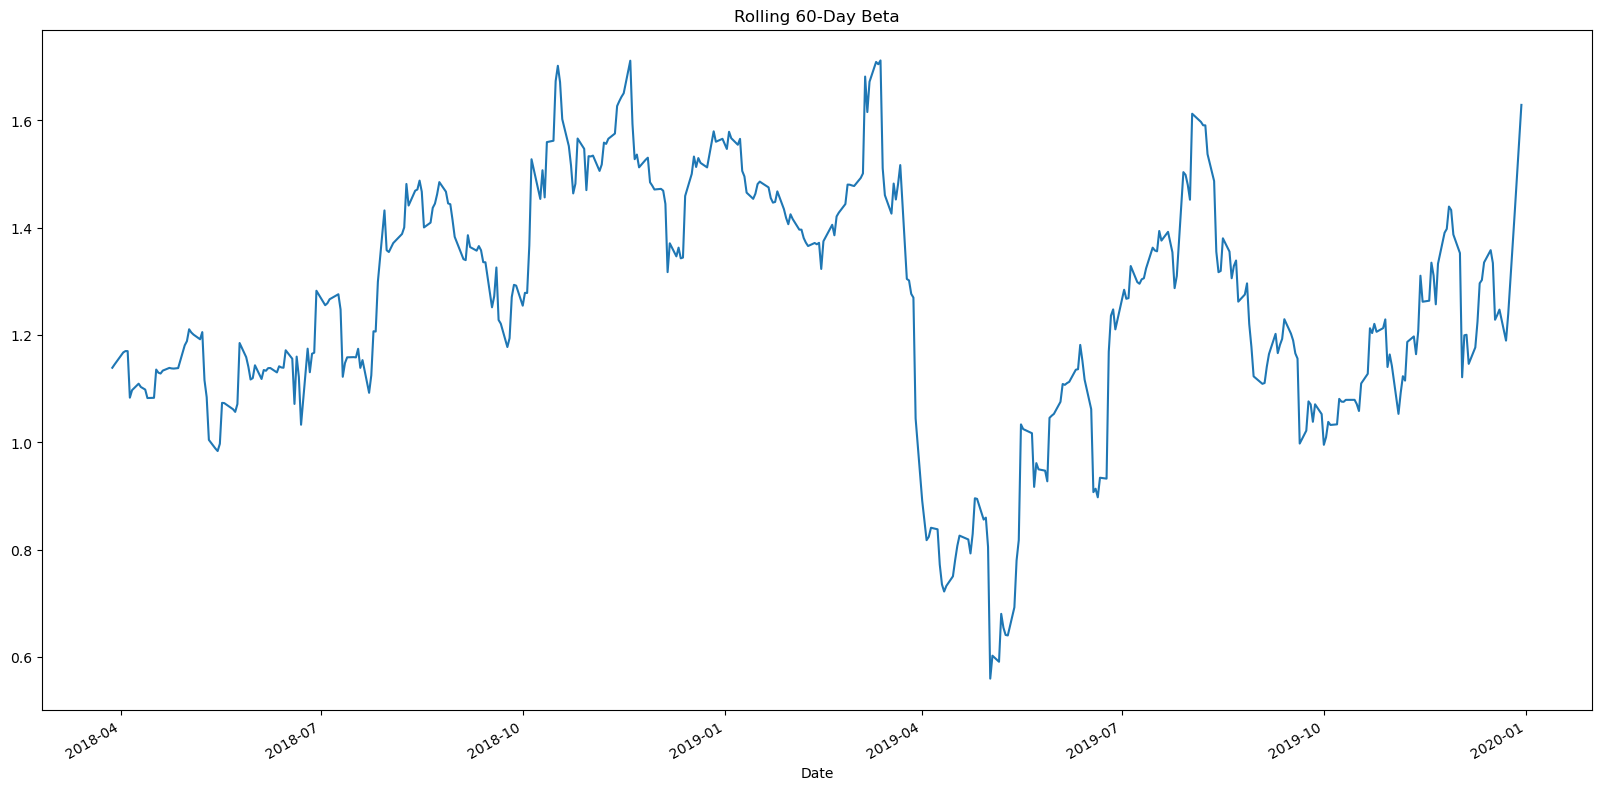

In [393]:
# Calculate and plot Beta
rolling_covariance = portfolio_returns.rolling(window=60).cov(daily_returns['S&P TSX 60 Historic Returns'])
rolling_variance = daily_returns['S&P TSX 60 Historic Returns'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [397]:
# Calculate Annualized Sharpe Ratios
annualized_sr_port = (all_returns.mean() * 252)/(standard_dev * np.sqrt(252))

In [398]:
# Visualize the sharpe ratios as a bar plot
annualized_sr_port.boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

### How does your portfolio do?

Write your answer here!

In [ ]:
My Portfolio 